# Face Recognition Playground

## Anwendung

- Als bekannte Gesichter werden alle .jpg Files aus dem Ordner "known_people" importiert
- Neue Gesichter können in diesem Ordner abgelegt werden
- Das Bild auf dem die Gesichter erkannt werden sollen kann geändert werden

## Verwendete Bibliotheken:
- face_recognition - Python Library spezifisch für Gesichtserkennung basierend auf dlib (https://github.com/ageitgey/face_recognition)
- dlib - C++ Library als Deep Learning Library (https://dlib.net) 
- opencv - Computer Vision Library hier verwendet für Bildmanipulationen (https://opencv.org/)


In [45]:
%matplotlib inline

import face_recognition
import numpy as np
import glob
import cv2


import matplotlib.image as matplotimg

from matplotlib import pyplot as plt

In [46]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Einlesen der "known_people"

Einlesen aller bekannten Gesichter (*.jpg) Files aus dem known_people Ordern. 

Extraktion der Face Encodings (Gesichtsmerkmale) auf allen bekannten Gesichtern.

Extraktion der Labels (Gesichternamen) aus dem Filenamen.

In [36]:
known_face_encodings = []
known_face_names = []

list_of_files = [f for f in glob.glob('known_people/*.jpg')]
number_files = len(list_of_files)

names = list_of_files.copy()

for i in range(number_files):
    globals()['image_{}'.format(i)] = face_recognition.load_image_file(list_of_files[i])
    globals()['image_encoding_{}'.format(i)] = face_recognition.face_encodings(globals()['image_{}'.format(i)])[0]
    known_face_encodings.append(globals()['image_encoding_{}'.format(i)])

    # Create array of known names
    names[i] = names[i].replace("known_people/", "")  
    known_face_names.append(names[i])

## Einlesen des zu erkennenden Bildes

In [48]:
filename = 'images_to_recognize/bundesratsfoto_2018.png'

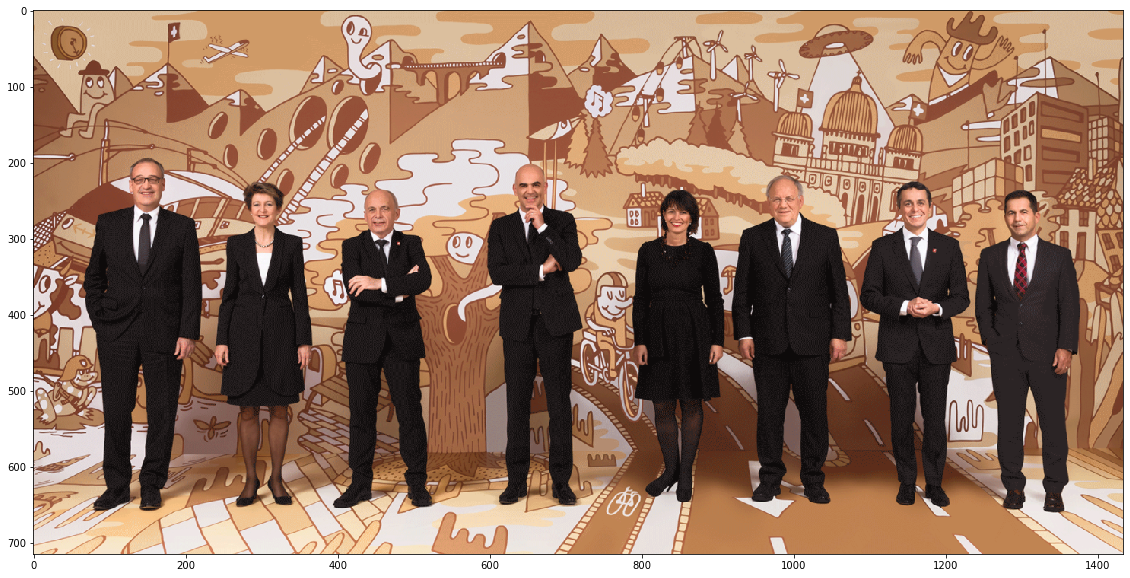

In [49]:
image_to_recognize_raw = cv2.imread(filename)
# Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
image_to_recognize = image_to_recognize_raw[:, :, ::-1]
plt.imshow(image_to_recognize)
plt.show()

## Erkennung der Gesichter

Zum Erkennen der Gesichter werden zuerst die Bounding Boxes der Gesichter bestimmt.

Anschliessend werden pro Bounding Box die Face Encodings (Gesichtsmerkmale) extrahiert.

Diese Face Encodings werden mit den bekannten Face Encodings abgeglichen und es wird bestimt ob es einen Match gab. Wenn es einen Match gab, wird bestimmt, welches der passenden Gesichter dem zu bestimmenden Gesicht am ähnlichsten ist

In [50]:
face_locations = []
face_encodings = []
face_names = []

In [7]:
face_locations = face_recognition.face_locations(image_to_recognize)
face_encodings = face_recognition.face_encodings(image_to_recognize, face_locations)

face_names = []
for face_encoding in face_encodings:
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    # Use the known face with the smallest distance to the new face
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    face_names.append(name)

In [8]:
# Display the results
for (top, right, bottom, left), name in zip(face_locations, face_names):
    # Draw a box around the facea
    cv2.rectangle(image_to_recognize_raw, (left, top), (right, bottom), (0, 0, 255), 2)
    # Draw a label with a name below the face
    cv2.rectangle(image_to_recognize_raw, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image_to_recognize_raw, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

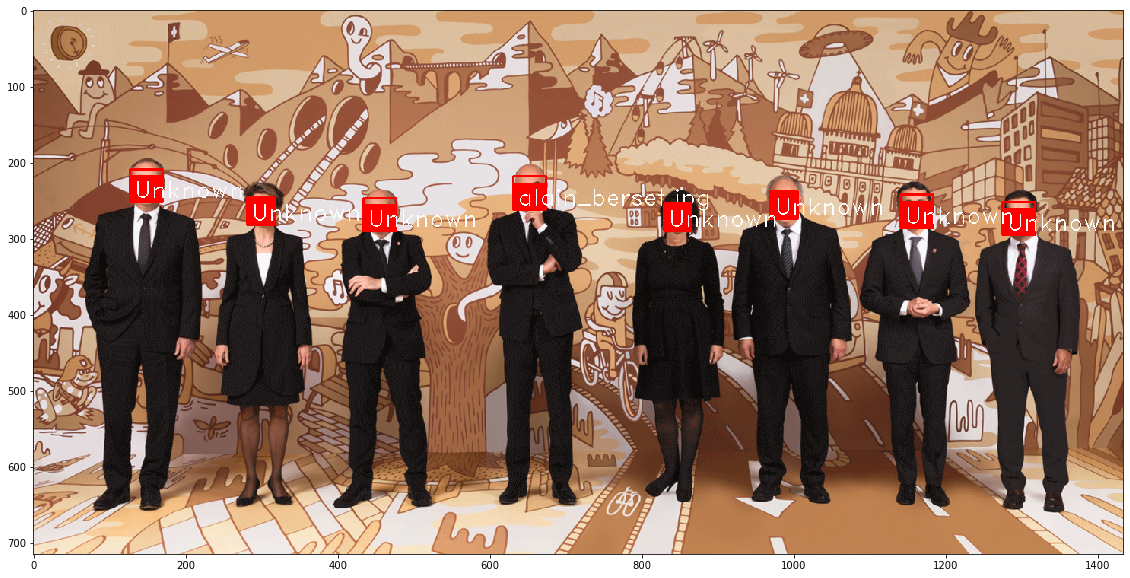

In [9]:
plt.imshow(image_to_recognize_raw[:, :, ::-1])
plt.show()